In [ ]:
!pip uninstall networkx community python-louvain -y

In [ ]:
!pip install python-louvain networkx==3.2.1 cdlib==0.2.6 leidenalg igraph louvain pycombo karateclub

In [5]:
import networkx as nx
from cdlib import algorithms, evaluation
import matplotlib.pyplot as plt
from collections import defaultdict
import time

In [6]:
ALGORITHMS = ['CNM', 'Louvain', 'Leiden', 'Combo', 'rb_pots', 'Paris', 'EdMot']

In [65]:
def run_experiments(graphs) -> tuple:
  runtimes = defaultdict(list)
  modularities = defaultdict(list)
  communities = defaultdict(list)

  for G in graphs:
    for i, algo in enumerate(ALGORITHMS):
      coms = None
      curr_runtimes = []
      curr_mods = []

      for _ in range(3):
        start_time = time.time()

        if i == 0:
          coms = algorithms.greedy_modularity(G)
        elif i == 1:
          coms = algorithms.louvain(G)
        elif i == 2:
          coms = algorithms.leiden(G)
        elif i == 3:
          coms = algorithms.pycombo(G)
        elif i == 4:
          coms = algorithms.rb_pots(G)
        elif i == 5:
          coms = algorithms.paris(G)
        elif i == 6:
          coms = algorithms.edmot(G)

        end_time = time.time()

        curr_runtimes.append(end_time - start_time)
        modularity = evaluation.newman_girvan_modularity(G, coms)
        curr_mods.append(modularity.score)

      # compute average runtime and modularity score
      runtimes[algo].append(sum(curr_runtimes)/ len(curr_runtimes))
      modularities[algo].append(sum(curr_mods) / len(curr_mods))
      communities[algo].append(coms)

  return runtimes, modularities, communities

In [76]:
def plot_results(runtimes, modularities, graph_sizes, combined=True) -> None:
  if combined:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    for algo in ALGORITHMS:
      ax1.plot(graph_sizes, runtimes[algo], label=algo)
    ax1.grid(True)
    ax1.set_xlabel('Size of Graph (# of nodes)')
    ax1.set_ylabel('Runtime (seconds)')
    ax1.set_title('Runtime Comparison')
    ax1.legend()

    for algo in ALGORITHMS:
      ax2.plot(graph_sizes, modularities[algo], label=algo)
    ax2.grid(True)
    ax2.set_xlabel('Size of Graph (# of nodes)')
    ax2.set_ylabel('CNM Modularity Score')
    ax2.set_title('Modularity Comparison')
    ax2.legend()

  else:
    num_algorithms = len(ALGORITHMS)
    fig, axes = plt.subplots(num_algorithms, 2, figsize=(12, 6 * num_algorithms))

    for i, algo in enumerate(ALGORITHMS):
      ax1 = axes[i, 0]
      ax2 = axes[i, 1]

      ax1.plot(graph_sizes, runtimes[algo])
      ax1.grid(True)
      ax1.set_xlabel('Size of Graph (# of nodes)')
      ax1.set_ylabel('Runtime (seconds)')
      ax1.set_title(f'{algo} Runtime')

      ax2.plot(graph_sizes, modularities[algo])
      ax2.grid(True)
      ax2.set_xlabel('Size of Graph (# of nodes)')
      ax2.set_ylabel('CNM Modularity Score')
      ax2.set_title(f'{algo} Modularity')

  plt.tight_layout()
  plt.show()

In [74]:
def plot_communities(graphs, coms_dict, graph_index, graph_sizes) -> None:
  G = graphs[graph_index]
  G.remove_edges_from(nx.selfloop_edges(G))

  fig, axes = plt.subplots(3, 3, figsize=(15, 15))
  axes = axes.flatten()

  for i, algo in enumerate(ALGORITHMS):
    coms = coms_dict[algo][graph_index]
    community_map = {node: i for i, community in enumerate(coms.communities) for node in community}
    colors = [community_map[node] for node in G.nodes()]

    ax = axes[i]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax, node_color=colors, with_labels=True, node_size=200)
    ax.set_title(f"{algo} (graph_size = {graph_sizes[graph_index]})")

  plt.tight_layout()
  plt.show()

In [39]:
graph_sizes = [100, 500, 1000, 1500, 2000]
num_edges = 2
graphs = []
for graph_size in graph_sizes:
  graphs.append(nx.barabasi_albert_graph(graph_size, num_edges, seed=1))

In [40]:
runtimes, modularities, communities = run_experiments(graphs)

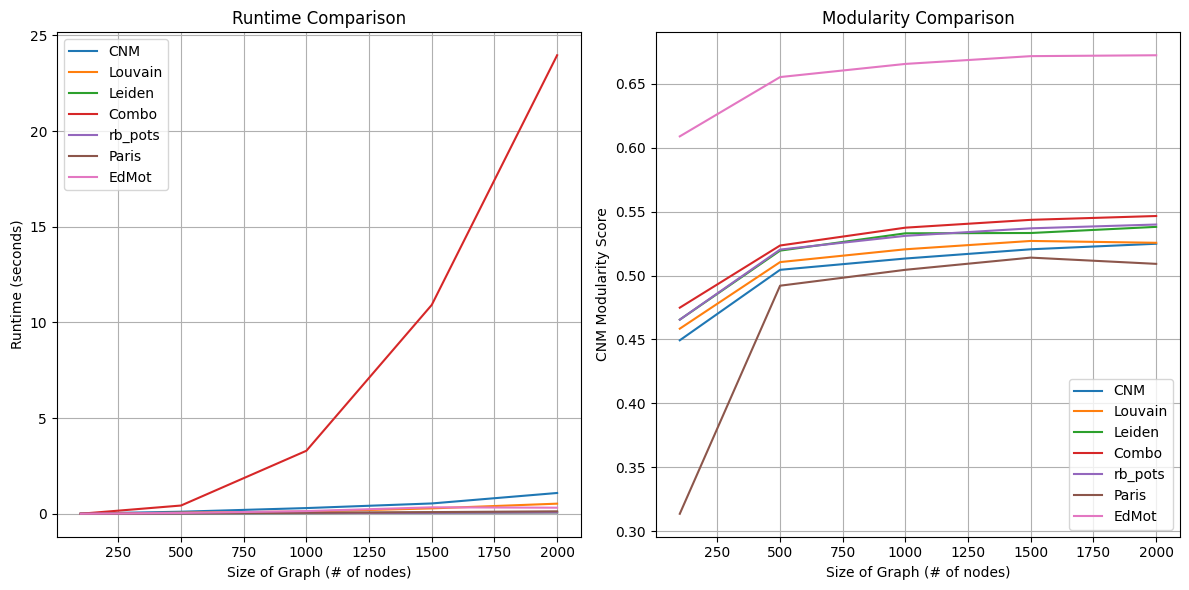

In [73]:
plot_results(runtimes, modularities, graph_sizes)

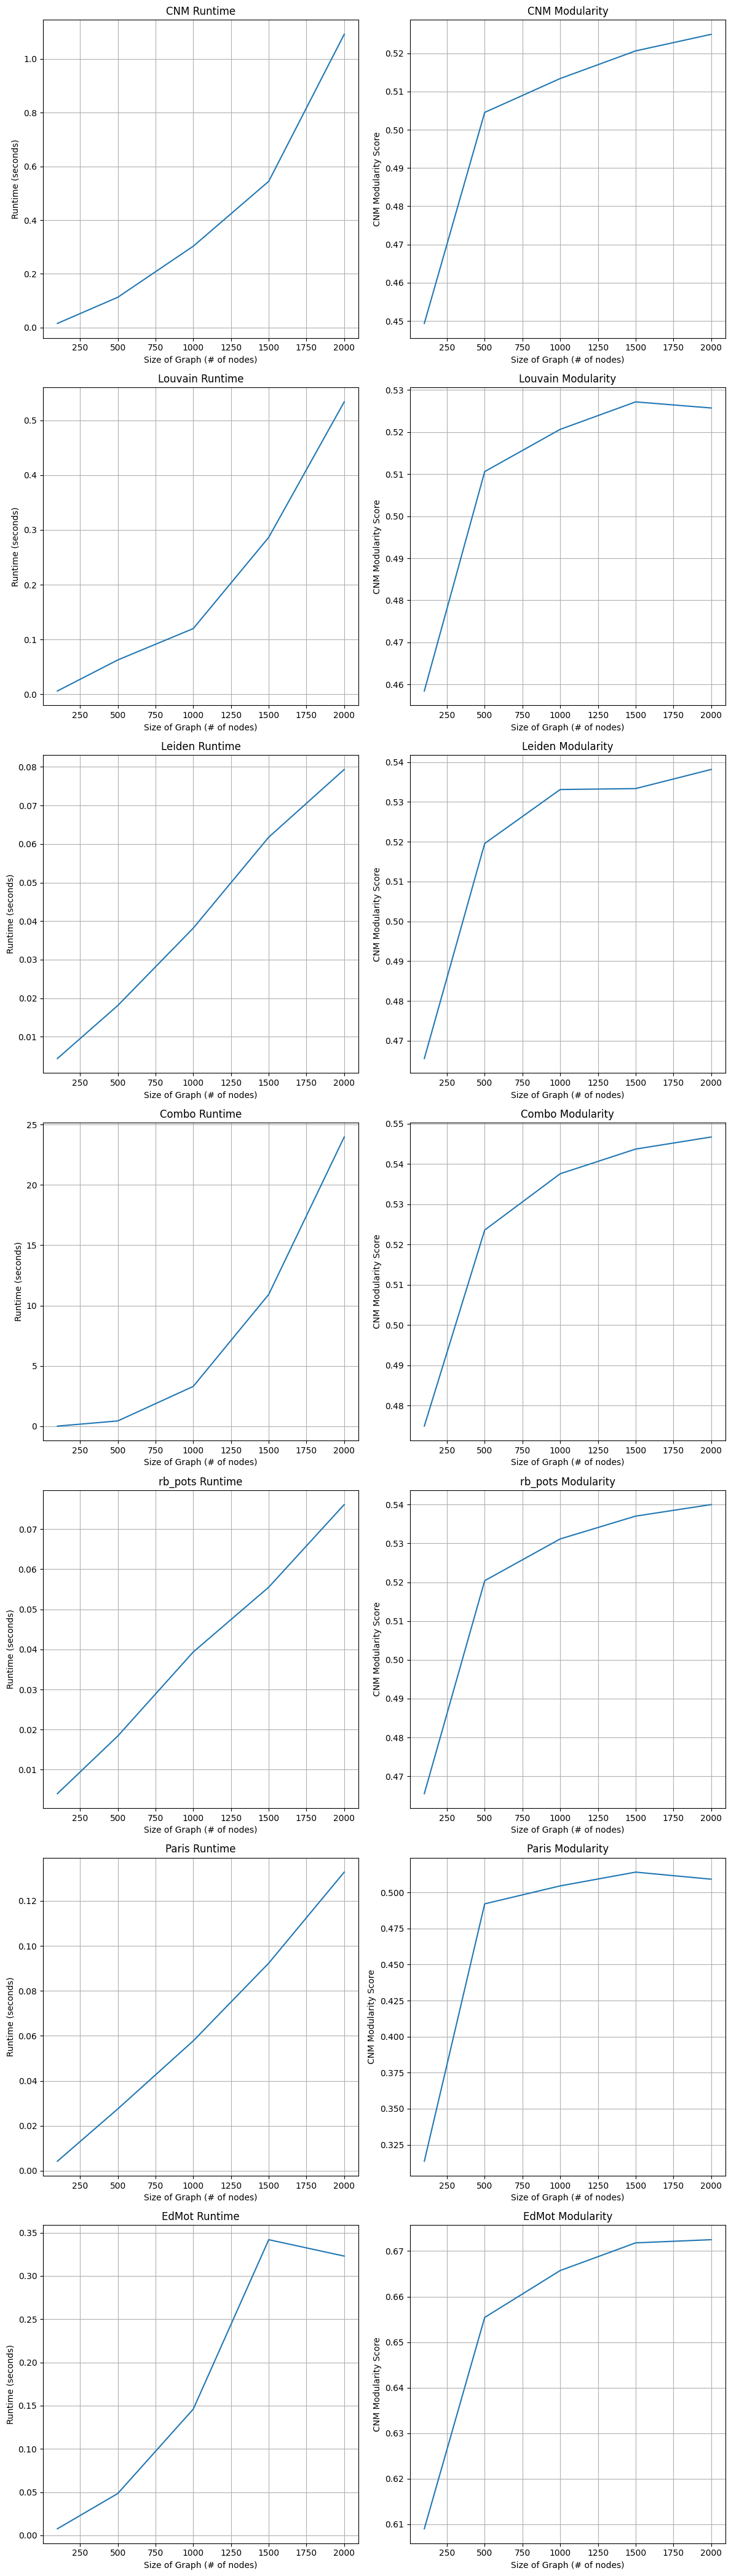

In [77]:
plot_results(runtimes, modularities, graph_sizes, False)

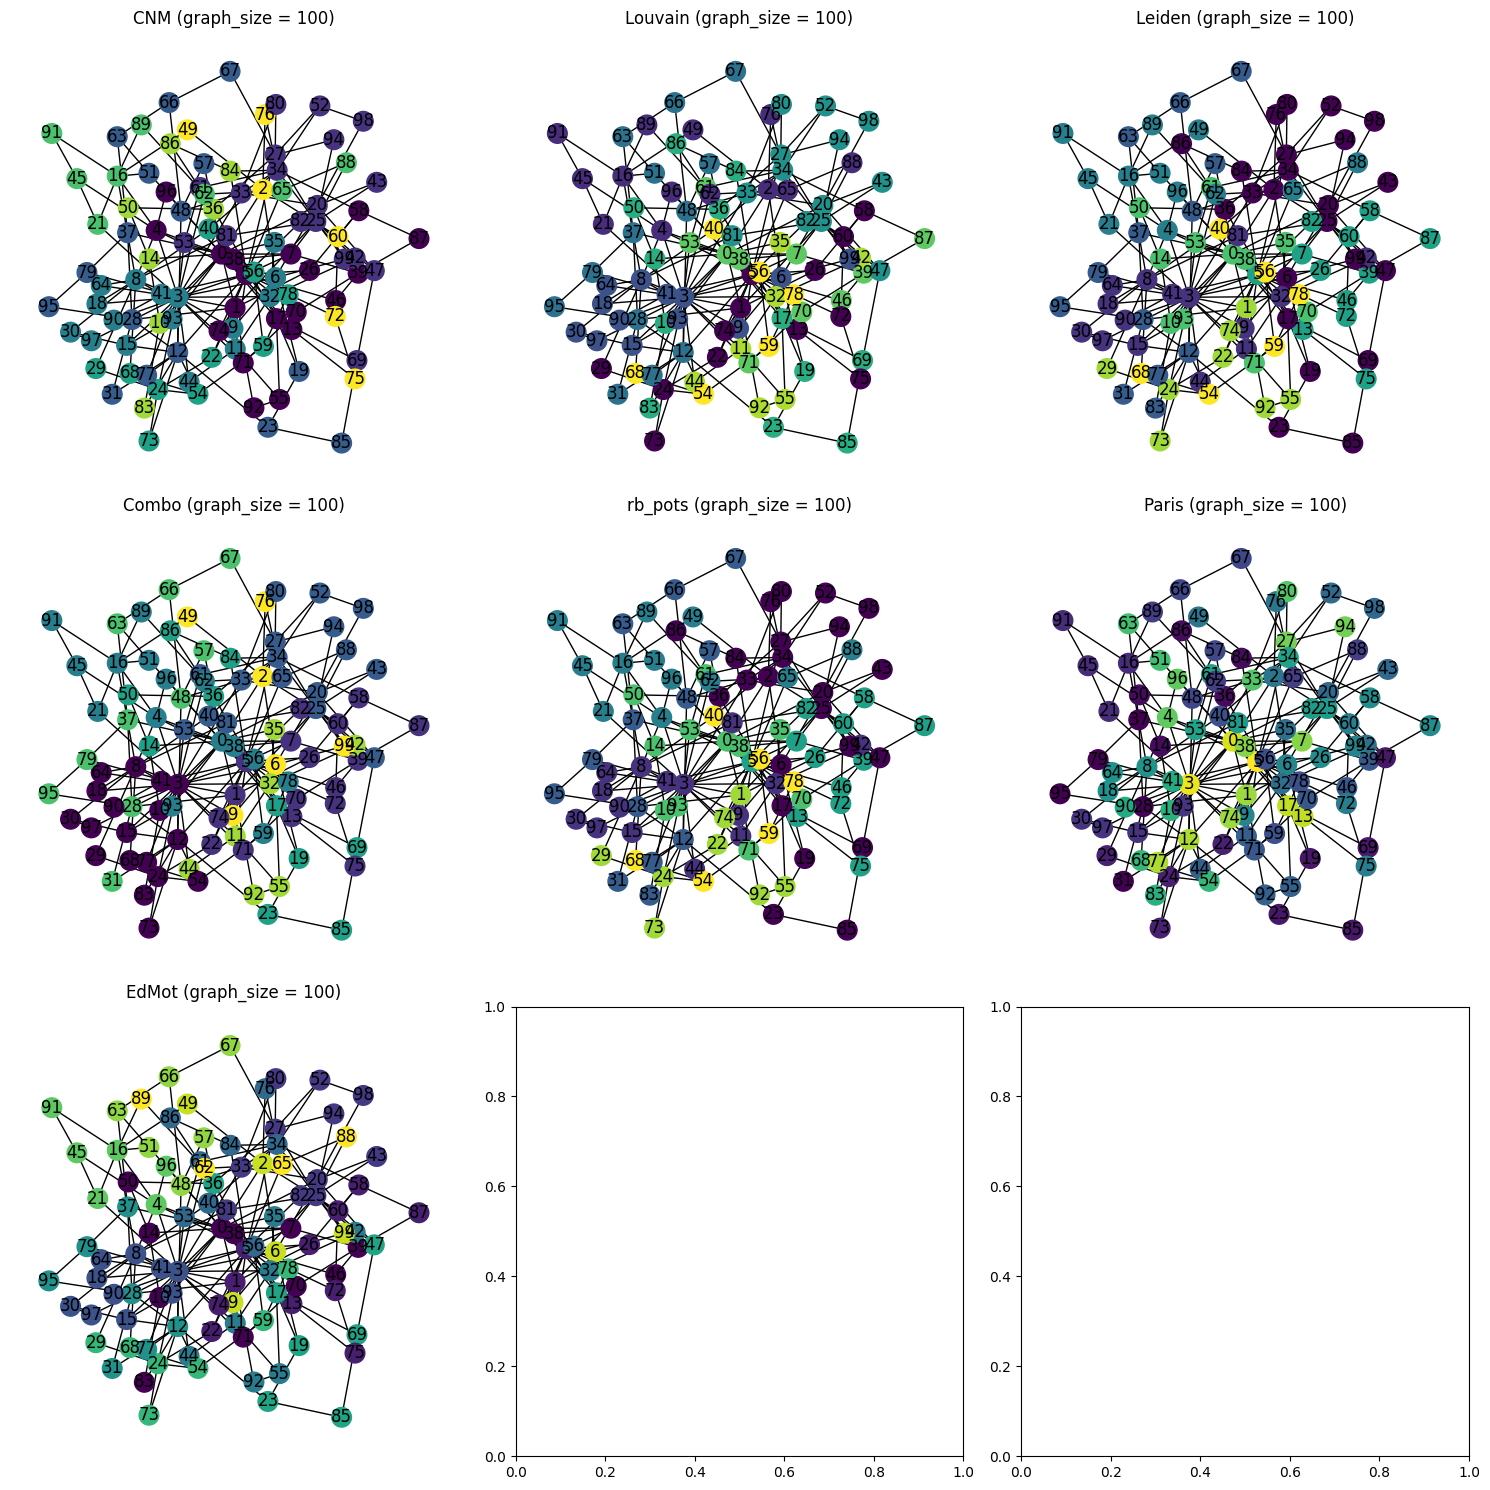

In [64]:
plot_communities(graphs, communities, 0, graph_sizes)